In [1]:
import os

In [2]:
data_dir = '/home/bruno/Documents/simulacoes/DL/CNN/cell_images'

In [3]:
os.listdir(data_dir)

['test', 'train']

# Working with Custom Images

So far everything we've worked with has been nicely formatted for us already by Keras.

Let's explore what its like to work with a more realistic data set.

## The Data

-----------

## PLEASE NOTE: THIS DATASET IS VERY LARGE. IT CAN BE DOWNLOADED FROM THE PREVIOUS LECTURE. PLEASE WATCH THE VIDEO LECTURE ON HOW TO GET THE DATA.

## USE OUR VERSION OF THE DATA. WE ALREADY ORGANIZED IT FOR YOU!!

--------
----------
--------

ORIGINAL DATA SOURCE:

The dataset contains 2 folders - Infected - Uninfected

And a total of 27,558 images.

Acknowledgements
This Dataset is taken from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/ 

**Note: We will be dealing with real image files, NOT numpy arrays. Which means a large part of this process will be learning how to work with and deal with large groups of image files. This is too much data to fit in memory as a numpy array, so we'll need to feed it into our model in batches. **

### Visualizing the Data


-------
Let's take a closer look at the data.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns

%config Completer.use_jedi = False        # For autocomplete to work!

In [5]:
sns.set(rc={'figure.figsize':(10,6)})
sns.set_style('whitegrid')
sns.set_palette('Set2')

In [6]:
data_dir = '/home/bruno/Documents/simulacoes/DL/CNN/cell_images'

In [7]:
os.listdir(data_dir)

['test', 'train']

In [8]:
test_path = data_dir+'/test/'
train_path = data_dir+'/train/'

In [9]:
test_path

'/home/bruno/Documents/simulacoes/DL/CNN/cell_images/test/'

In [10]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [11]:
os.listdir(train_path)

['parasitized', 'uninfected']

Look at single image:

In [12]:
os.listdir(train_path+'parasitized')[0]

'C113P74ThinF_IMG_20150930_134429_cell_184.png'

In [13]:
para_cell = train_path+'parasitized/'+os.listdir(train_path+'parasitized')[0]

In [14]:
para_cell

'/home/bruno/Documents/simulacoes/DL/CNN/cell_images/train/parasitized/C113P74ThinF_IMG_20150930_134429_cell_184.png'

In [15]:
imread(para_cell)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [16]:
imread(para_cell).shape

(112, 106, 3)

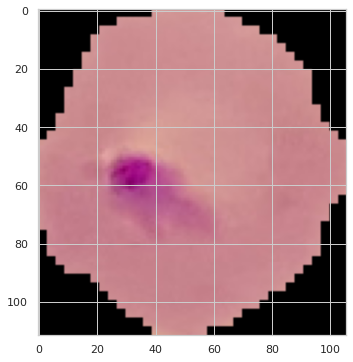

In [17]:
plt.imshow(imread(para_cell));

In [18]:
uninfected_cell = train_path+'uninfected/'+os.listdir(train_path+'uninfected')[0]

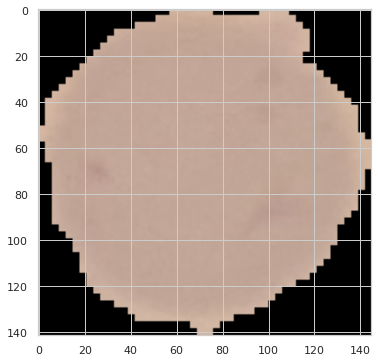

In [19]:
plt.imshow(imread(uninfected_cell));

**Let's check how many images there are.**

In [20]:
len(os.listdir(train_path+'parasitized'))

12480

In [21]:
len(os.listdir(train_path+'uninfected'))

12480

In [22]:
len(os.listdir(test_path+'parasitized'))

1300

In [23]:
len(os.listdir(test_path+'uninfected'))

1300

**Let's find out the average dimensions of these images.**

In [24]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+'uninfected'):
    
    img = imread(test_path+'uninfected/'+image_filename)
    # Images are shaped as width,height,color channels
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [25]:
dim1

[115,
 130,
 169,
 148,
 103,
 172,
 124,
 118,
 145,
 118,
 136,
 127,
 142,
 103,
 136,
 151,
 106,
 121,
 121,
 118,
 136,
 103,
 130,
 124,
 118,
 115,
 121,
 118,
 124,
 145,
 127,
 139,
 169,
 121,
 130,
 145,
 121,
 145,
 106,
 97,
 127,
 145,
 124,
 127,
 154,
 124,
 124,
 142,
 100,
 133,
 112,
 151,
 100,
 124,
 121,
 148,
 145,
 130,
 127,
 148,
 118,
 157,
 139,
 127,
 121,
 154,
 118,
 124,
 184,
 130,
 106,
 103,
 115,
 145,
 136,
 127,
 109,
 133,
 130,
 118,
 133,
 115,
 136,
 130,
 109,
 148,
 118,
 103,
 109,
 127,
 115,
 112,
 124,
 136,
 127,
 130,
 127,
 124,
 112,
 136,
 136,
 124,
 118,
 151,
 136,
 115,
 142,
 169,
 121,
 136,
 130,
 145,
 115,
 118,
 130,
 130,
 130,
 133,
 106,
 154,
 124,
 160,
 160,
 145,
 94,
 130,
 127,
 169,
 139,
 151,
 112,
 118,
 130,
 148,
 184,
 127,
 124,
 118,
 196,
 112,
 127,
 142,
 115,
 148,
 133,
 127,
 163,
 94,
 136,
 106,
 121,
 91,
 127,
 121,
 97,
 130,
 121,
 133,
 148,
 121,
 76,
 109,
 169,
 142,
 130,
 139,
 115,
 133

<Figure size 720x432 with 0 Axes>

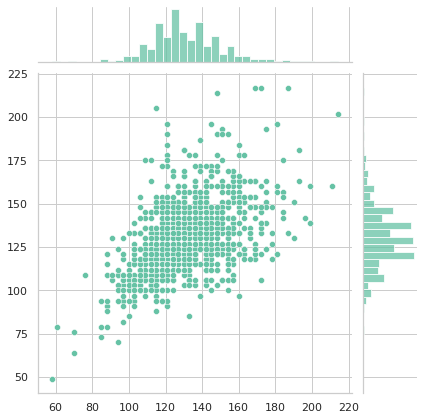

In [26]:
plt.figure(figsize=(10,6))
sns.jointplot(x=dim1,y=dim2);

To use the CNN we need to resize all images to same dimensions!
We'll chose the average size for the resized ones.

In [27]:
np.mean(dim1)

130.92538461538462

In [28]:
np.mean(dim2)

130.75

In [29]:
image_shape = (130,130,3)

## Preparing the Data for the model

There is too much data for us to read all at once in memory. We can use some built in functions in Keras to automatically process the data, generate a flow of batches from a directory, and also manipulate the images.

### Image Manipulation

It's usually a good idea to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. We can use the **ImageDataGenerator** to do this automatically for us. Check out the documentation for a full list of all the parameters you can use here!

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [31]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module tensorflow.python.keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Arguments:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0

In [32]:
image_gen = ImageDataGenerator(rotation_range=20, # rotates the image 20deg
                               width_shift_range = 0.1, # Shift the pic width by a max of 10%
                               height_shift_range = 0.1,# shift the pic height by a max of 10%
                               rescale = 1/255, # Rescale the image by normalizing it
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10%
                               horizontal_flip=True, # Allow horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

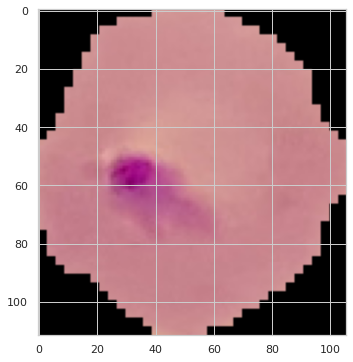

In [33]:
para_img = imread(para_cell)
plt.imshow(para_img)

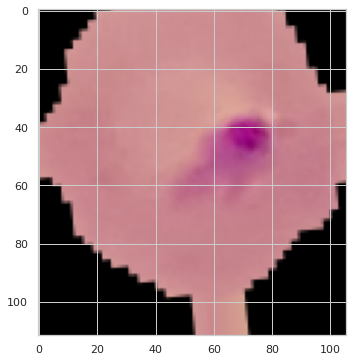

In [34]:
# Seeing the random transformation from our generator
plt.imshow(image_gen.random_transform(para_img))

### Generating many manipulated images from a directory


In order to use .flow_from_directory, you must organize the images in sub-directories. This is an **absolute requirement**, otherwise the method won't work. The directories should only contain images of one class, so one folder per class of images.

Structure Needed:

* Image Data Folder
    * Class 1
        * 0.jpg
        * 1.jpg
        * ...
    * Class 2
        * 0.jpg
        * 1.jpg
        * ...
    * ...
    * Class n
    
In our folder we already have (for train and test separately) two classes in different folders: `parasitized` and `uninfected`.

In [35]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [36]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


# Creating the Model

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

In [38]:
##https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [40]:
from tensorflow.keras.callbacks import EarlyStopping

In [41]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [42]:
batch_size = 16

In [43]:
image_shape[:2]

(130, 130)

In [44]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary')

Found 24958 images belonging to 2 classes.


In [45]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',
                                               shuffle=False) # Test data shouldn't be shuffled (mixes the indices)

Found 2600 images belonging to 2 classes.


In [46]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [47]:
results = model.fit(train_image_gen, epochs=20,
                              validation_data=test_image_gen,
                              callbacks = [early_stop])

Epoch 1/20
1560/1560 [==============================] - 301s 193ms/step - loss: 0.3441 - accuracy: 0.8538 - val_loss: 0.2079 - val_accuracy: 0.9300
Epoch 2/20
1560/1560 [==============================] - 302s 193ms/step - loss: 0.1813 - accuracy: 0.9433 - val_loss: 0.1919 - val_accuracy: 0.9423
Epoch 3/20
1560/1560 [==============================] - 277s 178ms/step - loss: 0.1679 - accuracy: 0.9470 - val_loss: 0.1676 - val_accuracy: 0.9431
Epoch 4/20
1560/1560 [==============================] - 276s 177ms/step - loss: 0.1619 - accuracy: 0.9488 - val_loss: 0.1685 - val_accuracy: 0.9454
Epoch 5/20
1560/1560 [==============================] - 276s 177ms/step - loss: 0.1586 - accuracy: 0.9502 - val_loss: 0.2100 - val_accuracy: 0.9396


In [56]:
from tensorflow.keras.models import load_model

In [57]:
model.save('malaria_detector.h5')

# Evaluate the model

In [58]:
losses = pd.DataFrame(model.history.history)

In [59]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.344102,0.853834,0.207911,0.930000
1,0.181316,0.943305,0.191886,0.942308
2,0.167918,0.946991,0.167614,0.943077
3,0.161911,0.948754,0.168512,0.945385
4,0.158587,0.950196,0.209976,0.939615


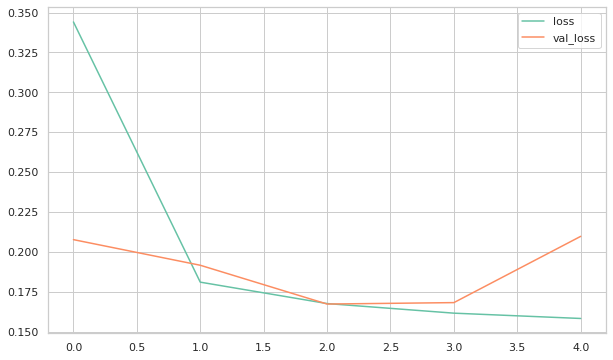

In [60]:
losses[['loss','val_loss']].plot();

In [62]:
model.evaluate(test_image_gen)

163/163 [==============================] - 14s 83ms/step - loss: 0.2126 - accuracy: 0.9419


[0.21255600452423096, 0.9419230818748474]

In [63]:
model.metrics_names

['loss', 'accuracy']

In [64]:
pred = model.predict(test_image_gen)

In [65]:
pred

array([[1.47002165e-05],
       [6.15439058e-05],
       [1.62303448e-04],
       ...,
       [9.91016626e-01],
       [9.78010535e-01],
       [9.87060249e-01]], dtype=float32)

This returns probabilities.

In [66]:
predictions = pred > 0.5

This is something you could tune! The threshold of 0.5 can be changed...

In [67]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [68]:
len(pred) # Should be 1300+1300 for the entire test set

2600

In [69]:
from sklearn.metrics import classification_report, confusion_matrix

In [70]:
test_image_gen.classes # This are our y_test values!

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [71]:
print(classification_report(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      1300
           1       0.91      0.98      0.94      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



In [72]:
confusion_matrix(test_image_gen.classes, predictions)

array([[1168,  132],
       [  29, 1271]])

<AxesSubplot:>

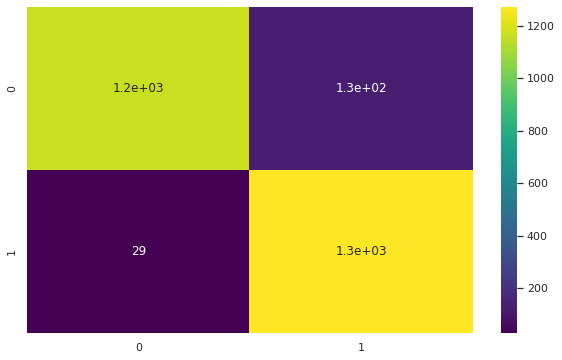

In [74]:
sns.heatmap(confusion_matrix(test_image_gen.classes, predictions), annot=True,
            cmap='viridis')

# Predicting on an Image

In [75]:
from tensorflow.keras.preprocessing import image

In [77]:
my_image = image.load_img(para_cell, target_size=image_shape)

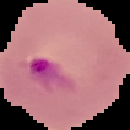

In [78]:
my_image

In [79]:
my_img_arr = image.img_to_array(my_image)

In [80]:
my_img_arr

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [81]:
my_img_arr.shape

(130, 130, 3)

We need to reshape the image to have (1,130,130,3), as (number of images, width, height, color channels).

In [82]:
my_img_arr = np.expand_dims(my_img_arr, axis=0)

In [83]:
my_img_arr.shape

(1, 130, 130, 3)

In [84]:
model.predict(my_img_arr)

array([[0.]], dtype=float32)

In [85]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

Predicted as `parasitized`, which looks correct from:

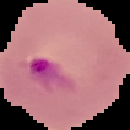

In [86]:
my_image